Raksha Kumar and Sneha Saravanan
Final Project Code
12/12/2025

In [1]:
pip install selenium webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from webdriver_manager.chrome import ChromeDriverManager

In [ ]:
box = pd.read_csv("boxoffice.csv")
box.head()
box.info()

In [ ]:
kaggle_df = pd.read_csv("movie_budgets_and_revenues.csv")
kaggle_df.head()

In [ ]:
top250_df = scrape_imdb_top250_selenium()
display(top250_df)

In [5]:
#Set up browser
browser = webdriver.Chrome()
url = 'https://www.imdb.com/chart/top/?ref_=chtbo_nv_menu'
    
browser.get(url)
browser.maximize_window()

wait = WebDriverWait(browser, 10)

#Each movie row in the list
rows = wait.until(
    EC.presence_of_all_elements_located(
        (By.CSS_SELECTOR, "li.ipc-metadata-list-summary-item")
    )
)

movies = []

for row in rows:
    try:
        title = row.find_element(
            By.CSS_SELECTOR, "h3.ipc-title__text").text.strip()
    except NoSuchElementException:
        # If we can't even find a title, skip this row (might be an ad or something odd)
        continue

    year = ""
    try:
        # first metadata item under cli-title-metadata is the year
        meta_spans = row.find_elements(
            By.CSS_SELECTOR, "div.cli-title-metadata span.cli-title-metadata-item")
        if meta_spans:
            year = meta_spans[0].text.strip()
    except NoSuchElementException:
        year = ""

#Rating
    rating = ""
    try:
        rating = row.find_element(By.CSS_SELECTOR, "span.ipc-rating-star--rating").text.strip()
    except NoSuchElementException:
        rating = ""

    movies.append({"title": title, "year": year, "rating": rating})
    moviedf = pd.DataFrame(movies)

#Output all 250 movies scrapped from webpage
display(moviedf)

browser.quit()

,title,year,rating
0,The Shawshank Redemption,1994,9.3
1,The Godfather,1972,9.2
2,The Dark Knight,2008,9.1
3,The Godfather Part II,1974,9.0
4,12 Angry Men,1957,9.0
...,...,...,...
245,Demon Slayer: Kimetsu no Yaiba - The Movie: Mu...,2020,8.2
246,Drishyam,2015,8.2
247,The Grapes of Wrath,1940,8.1
248,To Be or Not to Be,1942,8.1


In [11]:
#Open the kaggle dataset 
kaggle_df = pd.read_csv("movie_budgets_and_revenues 2.csv")
kaggle_df.head()

,Number,Release Date,Movie Name,Budget,Domestic Gross,Worldwide Gross
0,1,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$533,200,000","$936,662,225","$2,058,880,845"
1,2,"Dec 9, 2022",Avatar: The Way of Water,"$460,000,000","$684,075,767","$2,317,514,386"
2,3,"Jun 28, 2023",Indiana Jones and the Dial of Destiny,"$402,300,000","$174,480,468","$383,963,057"
3,4,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,748,242,781"
4,5,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"


In [45]:
#Clean site and dataset so it is easy to merge 
moviedf["Movie Name"] = moviedf["Movie Name"].str.strip()
moviedf["year"] = pd.to_numeric(moviedf["year"], errors="coerce")
moviedf["rating"] = pd.to_numeric(moviedf["rating"], errors="coerce")


kaggle_df["Movie Name"] = kaggle_df["Movie Name"].str.strip()
kaggle_df["Worldwide Gross"] = kaggle_df["Worldwide Gross"].replace(
    {"\$": "", ",": ""}, regex=True).astype(float)
kaggle_df["year"] = pd.to_datetime(kaggle_df["Release Date"], errors="coerce").dt.year


merged = moviedf.merge(kaggle_df, on=["Movie Name", "year"], how="inner")
display(merged.head())

,Movie Name,year,rating,Number,Release Date,Budget,Domestic Gross,Worldwide Gross
0,The Shawshank Redemption,1994,9.3,"2,526","Sep 23, 1994","$25,000,000","$28,241,469",2.871335e+07
1,The Godfather,1972,9.2,"4,487","Mar 15, 1972","$7,000,000","$136,479,994",2.700074e+08
2,The Dark Knight,2008,9.1,120,"Jul 11, 2008","$185,000,000","$534,235,491",1.007696e+09
3,12 Angry Men,1957,9.0,"6,245","Apr 13, 1957","$340,000",$0,3.790000e+02
4,The Lord of the Rings: The Return of the King,2003,9.0,535,"Dec 17, 2003","$94,000,000","$381,472,917",1.123838e+09


In [47]:
moviedf = moviedf.rename(columns={"title": "Movie Name"})

In [49]:
#Do an inner join and output movies that overlap 
merged = pd.merge(
    moviedf,
    kaggle_df,
    on = ["Movie Name"],
    how="inner"  
)
merged

,Movie Name,year_x,rating,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,year_y
0,The Shawshank Redemption,1994,9.3,"2,526","Sep 23, 1994","$25,000,000","$28,241,469",2.871335e+07,1994.0
1,The Godfather,1972,9.2,"4,487","Mar 15, 1972","$7,000,000","$136,479,994",2.700074e+08,1972.0
2,The Dark Knight,2008,9.1,120,"Jul 11, 2008","$185,000,000","$534,235,491",1.007696e+09,2008.0
3,12 Angry Men,1957,9.0,"6,245","Apr 13, 1957","$340,000",$0,3.790000e+02,1957.0
4,The Lord of the Rings: The Return of the King,2003,9.0,535,"Dec 17, 2003","$94,000,000","$381,472,917",1.123838e+09,2003.0
...,...,...,...,...,...,...,...,...,...
147,Rush,2013,8.1,"1,800","Sep 13, 2013","$38,000,000","$26,947,624",9.815920e+07,2013.0
148,The Wizard of Oz,1939,8.1,"5,412","Aug 25, 1939","$2,777,000","$35,037,326",3.534855e+07,1939.0
149,Stand by Me,1986,8.1,"4,353","Aug 8, 1986","$8,000,000","$52,287,414",5.228865e+07,1986.0
150,The Iron Giant,1999,8.1,"1,362","Aug 4, 1999","$50,000,000","$23,159,305",3.133392e+07,1999.0


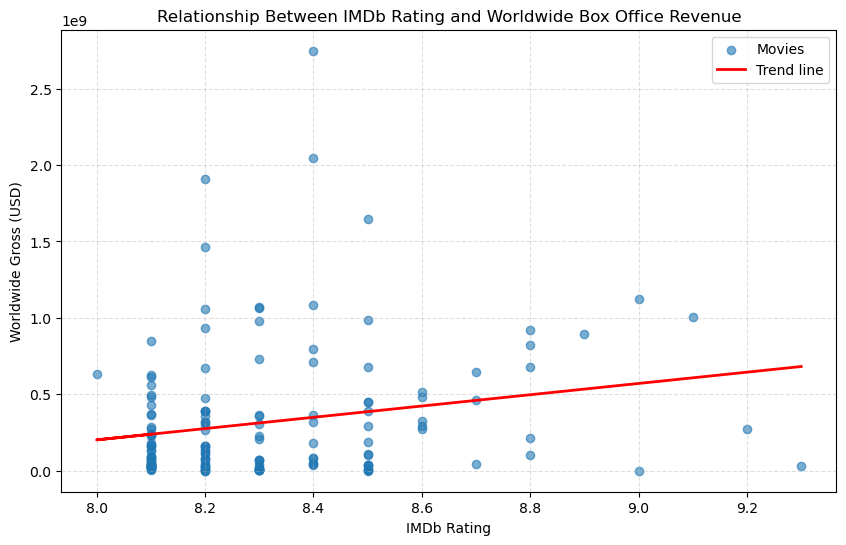

In [61]:
#Creating scatterplot to see the relationship between IMDb rating and Worldwide box office revenue with trendline
import numpy as np
import matplotlib.pyplot as plt

# X = IMDb rating
x = merged["rating"].astype(float)

# Y = Worldwide Gross (cleaned to numeric)
y = (
    merged["Worldwide Gross"]
         .replace('[\$,]', '', regex=True)  # remove $ and commas
         .astype(float)
)

plt.figure(figsize=(10,6))

# Scatter plot
plt.scatter(x, y, alpha=0.6, label="Movies")

# Regression line
coeffs = np.polyfit(x, y, 1)      # slope, intercept
trend = np.poly1d(coeffs)
plt.plot(x, trend(x), color="red", linewidth=2, label="Trend line")

plt.title("Relationship Between IMDb Rating and Worldwide Box Office Revenue")
plt.xlabel("IMDb Rating")
plt.ylabel("Worldwide Gross (USD)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()

plt.show()


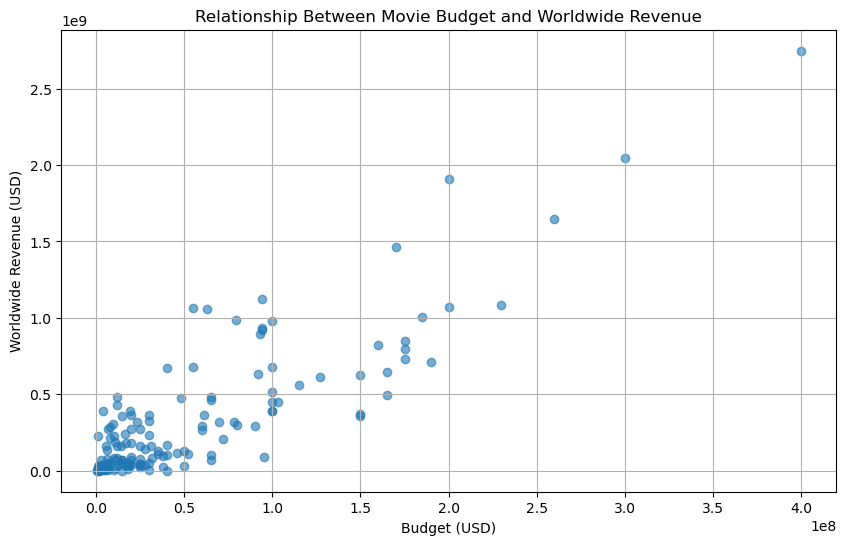

In [65]:
#Create another scatterplot to look at if budget affects worldwide revenue 
import matplotlib.pyplot as plt

#Numeric fields
merged["Budget_clean"] = merged["Budget"].replace("[\$,]", "", regex=True).astype(float)
merged["Worldwide_clean"] = merged["Worldwide Gross"].replace("[\$,]", "", regex=True).astype(float)

plt.figure(figsize=(10,6))
plt.scatter(merged["Budget_clean"], merged["Worldwide_clean"], alpha=0.6)

plt.title("Relationship Between Movie Budget and Worldwide Revenue")
plt.xlabel("Budget (USD)")
plt.ylabel("Worldwide Revenue (USD)")

plt.grid(True)
plt.show()


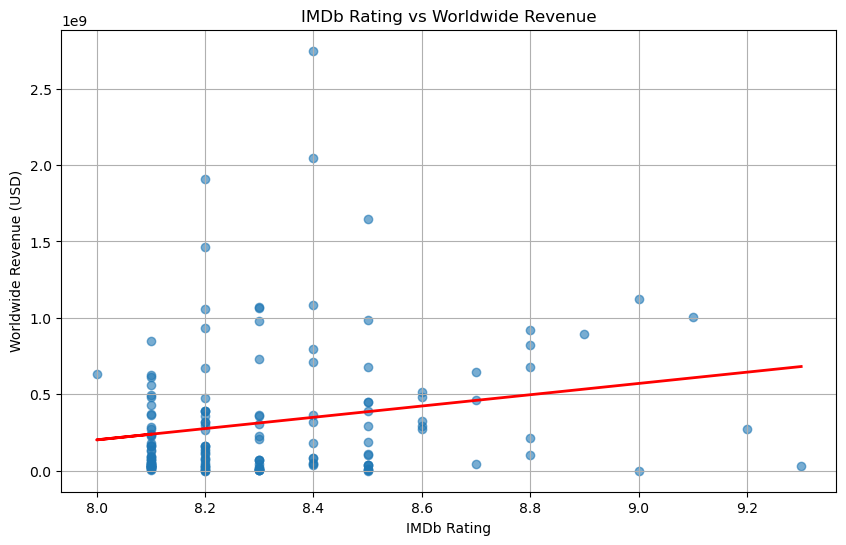

In [67]:
#Using madplot to create another scatterplot of IMdb rating vs worldwide revenue 
import numpy as np

x = merged["rating"].astype(float)
y = merged["Worldwide_clean"]

plt.figure(figsize=(10,6))

plt.scatter(x, y, alpha=0.6)

# Best-fit line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', linewidth=2)

plt.title("IMDb Rating vs Worldwide Revenue")
plt.xlabel("IMDb Rating")
plt.ylabel("Worldwide Revenue (USD)")
plt.grid(True)
plt.show()


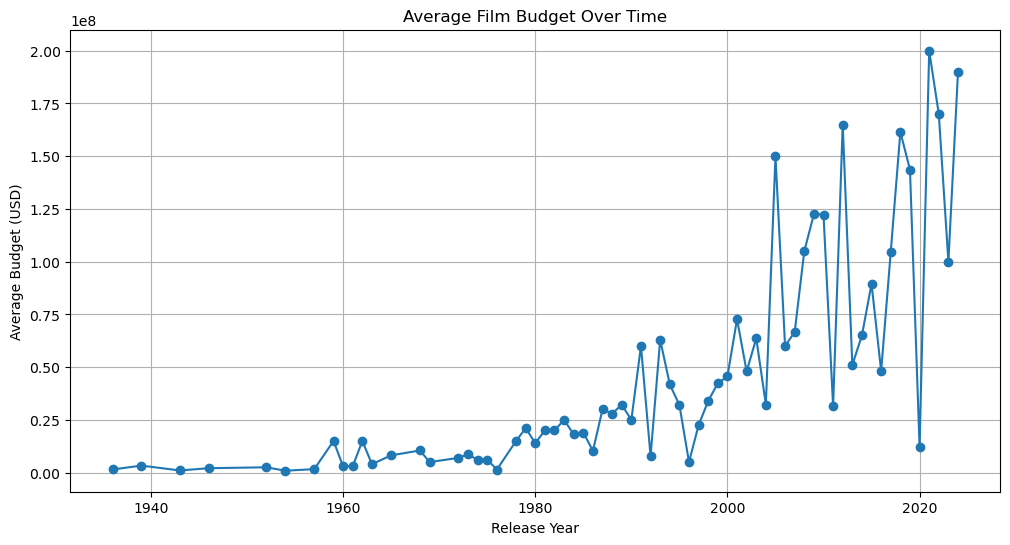

In [69]:
#Line chart to represent the average film budget over time 
budget_by_year = (
    merged.groupby("year_y")["Budget_clean"]
    .mean()
    .sort_index()
)

plt.figure(figsize=(12,6))
plt.plot(budget_by_year.index, budget_by_year.values, marker="o")

plt.title("Average Film Budget Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average Budget (USD)")
plt.grid(True)
plt.show()
